In [108]:
#import library 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [109]:
#read Iris data
data = pd.read_csv("/content/Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [110]:
#select variable that will be used for clustering, here I will take SepalLength to Petalwidth as the features
knn_data = data.iloc[:,1:5]
knn_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
#get the value from the features in array format
features_value = knn_data.values
features_value

In [112]:
#finding the optimal number of k for clustering using elbow method

from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features_value)
    Sum_of_squared_distances.append(km.inertia_)

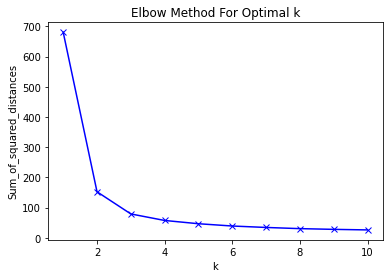

In [113]:
#Plotting the result to find the elbow
import matplotlib.pyplot as plt

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
pip install kneed

In [115]:
#finding the elbow using kneed locator
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), Sum_of_squared_distances, curve="convex", direction="decreasing")
kl.elbow

3

Using elbow method it can be found that the optimum number of cluster is 3

In [ ]:
#finally we will apply the k-means clustering with k number = 3
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(features_value)
y_kmeans = kmeans.predict(features_value)
y_kmeans

In [117]:
#viewclustering result
knn_data['cluster'] = y_kmeans
print(knn_data)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  cluster
0              5.1           3.5            1.4           0.2        1
1              4.9           3.0            1.4           0.2        1
2              4.7           3.2            1.3           0.2        1
3              4.6           3.1            1.5           0.2        1
4              5.0           3.6            1.4           0.2        1
..             ...           ...            ...           ...      ...
145            6.7           3.0            5.2           2.3        0
146            6.3           2.5            5.0           1.9        2
147            6.5           3.0            5.2           2.0        0
148            6.2           3.4            5.4           2.3        0
149            5.9           3.0            5.1           1.8        2

[150 rows x 5 columns]


In [140]:
centers = np.array(kmeans.cluster_centers_)
centers
df_cluster = pd.DataFrame(centers)
df_cluster 

,0,1,2,3
0,6.850000,3.073684,5.742105,2.071053
1,5.006000,3.418000,1.464000,0.244000
2,5.901613,2.748387,4.393548,1.433871


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


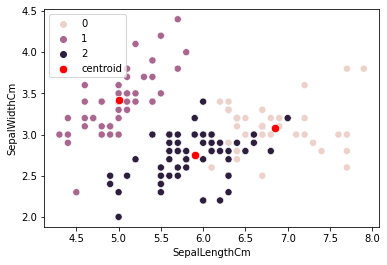

In [141]:
#last we will visualizing the clustering result using seaborn based on sepalwidth and sepalheight
import seaborn as sns
sns.scatterplot(x = knn_data.SepalLengthCm, y =knn_data.SepalWidthCm, s = 50, c = knn_data.cluster, marker = "o", hue = knn_data.cluster)
sns.scatterplot(centers[:,0], centers[:,1], marker="o", color='r', s = 70, label="centroid")

In [ ]:
https://pythonprogramminglanguage.com/kmeans-clustering-centroid/
